In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from warnings import filterwarnings
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf 
filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [39]:
data = pd.read_excel("Dataset.xlsx")
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13913,2021-07-15 00:00:00,1832,NaN,NaN,NaN
13914,2021-07-16 00:00:00,1822,NaN,NaN,NaN
13915,2021-07-19 00:00:00,1803.25,NaN,NaN,NaN
13916,2021-07-20 00:00:00,1815.3,NaN,NaN,NaN


In [3]:
data.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,GOLDAMGBD228NLBM,Gold Fixing Price 10:30 A.M. (London time) in ...,NaN,NaN,
7,NaN,NaN,NaN,NaN,NaN
8,Frequency: Daily,NaN,NaN,NaN,NaN
9,observation_date,GOLDAMGBD228NLBM,NaN,NaN,NaN


##### The data looks like it starts from 10th row

In [4]:
# Replacing the data variable with the proper data

data = pd.read_excel("Dataset.xlsx", skiprows=list(range(0,10)), index_col=0, parse_dates=True)
data

,GOLDAMGBD228NLBM,Unnamed: 2,Unnamed: 3,Unnamed: 4
observation_date,,,,
1968-04-01,38.00,NaN,NaN,NaN
1968-04-02,37.60,NaN,NaN,NaN
1968-04-03,37.70,NaN,NaN,NaN
1968-04-04,36.70,NaN,NaN,NaN
1968-04-05,37.20,NaN,NaN,NaN
...,...,...,...,...
2021-07-15,1832.00,NaN,NaN,NaN
2021-07-16,1822.00,NaN,NaN,NaN
2021-07-19,1803.25,NaN,NaN,NaN


In [5]:
start_date = data.index[0]
end_date = data.index[-1]
dates = pd.date_range(start_date, end_date)
missing = []
nan_data = []

for date in dates:
    if date not in data.index:
        missing.append(date)
        nan_data.append(np.nan)
        
df = pd.DataFrame({"GOLDAMGBD228NLBM": nan_data}, index= missing)

df

,GOLDAMGBD228NLBM
1968-04-06,NaN
1968-04-07,NaN
1968-04-13,NaN
1968-04-14,NaN
1968-04-20,NaN
...,...
2021-07-04,NaN
2021-07-10,NaN
2021-07-11,NaN
2021-07-17,NaN


In [6]:
total_df = pd.concat([data, df])
total_df.sort_index(inplace= True)
total_df


,GOLDAMGBD228NLBM,Unnamed: 2,Unnamed: 3,Unnamed: 4
1968-04-01,38.00,NaN,NaN,NaN
1968-04-02,37.60,NaN,NaN,NaN
1968-04-03,37.70,NaN,NaN,NaN
1968-04-04,36.70,NaN,NaN,NaN
1968-04-05,37.20,NaN,NaN,NaN
...,...,...,...,...
2021-07-17,NaN,NaN,NaN,NaN
2021-07-18,NaN,NaN,NaN,NaN
2021-07-19,1803.25,NaN,NaN,NaN
2021-07-20,1815.30,NaN,NaN,NaN


In [7]:
total_df.isnull().sum()

GOLDAMGBD228NLBM     5993
Unnamed: 2          19470
Unnamed: 3          19470
Unnamed: 4          19470
dtype: int64

In [8]:
df = total_df.interpolate(method ='linear', limit_direction ='forward', limit = 100)
df.isnull().sum()

GOLDAMGBD228NLBM        0
Unnamed: 2          19470
Unnamed: 3          19470
Unnamed: 4          19470
dtype: int64

In [44]:
df

,gold,Unnamed: 2,Unnamed: 3,Unnamed: 4,year,month,day,weekday
1968-04-01,38.00,NaN,NaN,NaN,1968,4,92,0
1968-04-02,37.60,NaN,NaN,NaN,1968,4,93,1
1968-04-03,37.70,NaN,NaN,NaN,1968,4,94,2
1968-04-04,36.70,NaN,NaN,NaN,1968,4,95,3
1968-04-05,37.20,NaN,NaN,NaN,1968,4,96,4
...,...,...,...,...,...,...,...,...
2021-07-17,1815.75,NaN,NaN,NaN,2021,7,198,5
2021-07-18,1809.50,NaN,NaN,NaN,2021,7,199,6
2021-07-19,1803.25,NaN,NaN,NaN,2021,7,200,0
2021-07-20,1815.30,NaN,NaN,NaN,2021,7,201,1


In [51]:
d = {'date': df.index, 'gold price':df["gold"]}
df1 = pd.DataFrame(data=d)
df1.reset_index(inplace = True, drop = True)

In [52]:
df1

,date,gold price
0,1968-04-01,38.00
1,1968-04-02,37.60
2,1968-04-03,37.70
3,1968-04-04,36.70
4,1968-04-05,37.20
...,...,...
19465,2021-07-17,1815.75
19466,2021-07-18,1809.50
19467,2021-07-19,1803.25
19468,2021-07-20,1815.30


In [63]:
df1['difference'] = df1['gold price'].diff(1)
df1

,date,gold price,difference
0,1968-04-01,38.00,NaN
1,1968-04-02,37.60,-0.40
2,1968-04-03,37.70,0.10
3,1968-04-04,36.70,-1.00
4,1968-04-05,37.20,0.50
...,...,...,...
19465,2021-07-17,1815.75,-6.25
19466,2021-07-18,1809.50,-6.25
19467,2021-07-19,1803.25,-6.25
19468,2021-07-20,1815.30,12.05


In [64]:
df1.dtypes

date          datetime64[ns]
gold price           float64
difference           float64
dtype: object

In [65]:
year_summary = df1.copy()
year_summary['date'] = pd.to_datetime(year_summary['date'])
year_summary

,date,gold price,difference
0,1968-04-01,38.00,NaN
1,1968-04-02,37.60,-0.40
2,1968-04-03,37.70,0.10
3,1968-04-04,36.70,-1.00
4,1968-04-05,37.20,0.50
...,...,...,...
19465,2021-07-17,1815.75,-6.25
19466,2021-07-18,1809.50,-6.25
19467,2021-07-19,1803.25,-6.25
19468,2021-07-20,1815.30,12.05


In [66]:
year_summary.dtypes 

date          datetime64[ns]
gold price           float64
difference           float64
dtype: object

In [67]:
year_summary['year'] = year_summary['date'].dt.year


In [68]:
year_summary

,date,gold price,difference,year
0,1968-04-01,38.00,NaN,1968
1,1968-04-02,37.60,-0.40,1968
2,1968-04-03,37.70,0.10,1968
3,1968-04-04,36.70,-1.00,1968
4,1968-04-05,37.20,0.50,1968
...,...,...,...,...
19465,2021-07-17,1815.75,-6.25,2021
19466,2021-07-18,1809.50,-6.25,2021
19467,2021-07-19,1803.25,-6.25,2021
19468,2021-07-20,1815.30,12.05,2021


In [71]:
year_summary = year_summary.groupby('year')['gold price'].mean()

In [72]:
year_summary

year
1968      39.855591
1969      41.082890
1970      35.954185
1971      40.787414
1972      58.139956
1973      97.260645
1974     159.106644
1975     160.973356
1976     124.881216
1977     147.841438
1978     193.472637
1979     307.622226
1980     613.092486
1981     460.087397
1982     376.058288
1983     423.444863
1984     360.354781
1985     317.474932
1986     367.971233
1987     447.065342
1988     437.162602
1989     381.617740
1990     383.713459
1991     362.188219
1992     343.783265
1993     360.025137
1994     384.215411
1995     384.203493
1996     387.701434
1997     331.108973
1998     294.249932
1999     278.882164
2000     279.264201
2001     271.217226
2002     310.454521
2003     363.733699
2004     409.695697
2005     445.202089
2006     604.925000
2007     696.993322
2008     872.626571
2009     973.117466
2010    1225.493904
2011    1571.832466
2012    1667.355533
2013    1409.555137
2014    1265.953630
2015    1159.901507
2016    1247.954133
2017    1258.20

In [77]:
year_summary = year_summary.reset_index()
year_summary

,year,gold price
0,1968,39.855591
1,1969,41.082890
2,1970,35.954185
3,1971,40.787414
4,1972,58.139956
5,1973,97.260645
6,1974,159.106644
7,1975,160.973356
8,1976,124.881216
9,1977,147.841438


In [78]:
year_summary['difference'] = year_summary['gold price'].diff(1)
year_summary

,year,gold price,difference
0,1968,39.855591,NaN
1,1969,41.082890,1.227300
2,1970,35.954185,-5.128705
3,1971,40.787414,4.833229
4,1972,58.139956,17.352541
5,1973,97.260645,39.120690
6,1974,159.106644,61.845999
7,1975,160.973356,1.866712
8,1976,124.881216,-36.092140
9,1977,147.841438,22.960223


In [156]:
year_summary['year over year percentage diff'] = year_summary['difference']/year_summary['gold price']*100
year_summary

,year,gold price,difference,year over year percentage diff
0,1968,39.855591,NaN,NaN
1,1969,41.082890,1.227300,2.987374
2,1970,35.954185,-5.128705,-14.264558
3,1971,40.787414,4.833229,11.849806
4,1972,58.139956,17.352541,29.846155
5,1973,97.260645,39.120690,40.222527
6,1974,159.106644,61.845999,38.870783
7,1975,160.973356,1.866712,1.159641
8,1976,124.881216,-36.092140,-28.901176
9,1977,147.841438,22.960223,15.530302


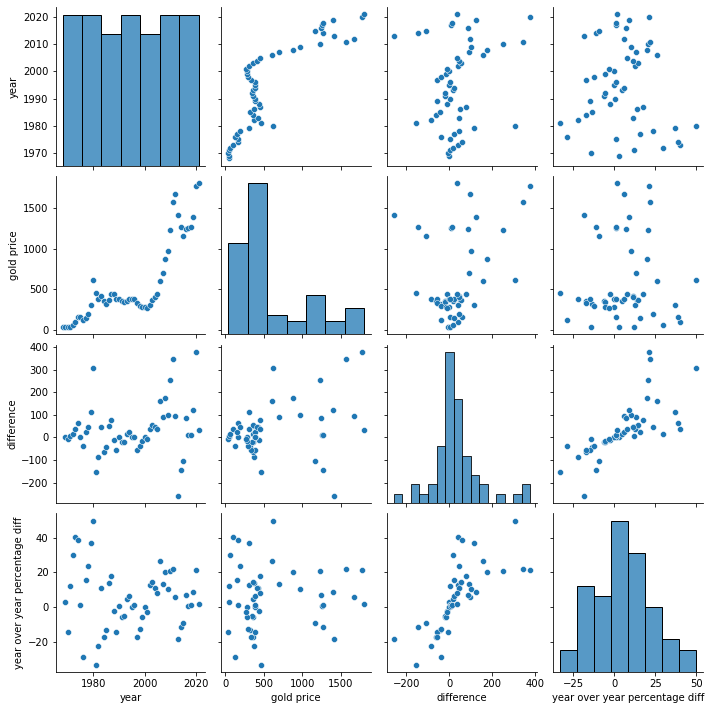

In [155]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(year_summary)

In [154]:
d = {'date': df.index, 'gold price':df["gold"]}
df2 = pd.DataFrame(data=d)
df2.reset_index(inplace = True, drop = True)

In [117]:
df2

,date,gold price
0,1968-04-01,38.00
1,1968-04-02,37.60
2,1968-04-03,37.70
3,1968-04-04,36.70
4,1968-04-05,37.20
...,...,...
19465,2021-07-17,1815.75
19466,2021-07-18,1809.50
19467,2021-07-19,1803.25
19468,2021-07-20,1815.30


In [118]:
df2['difference'] = df2['gold price'].diff(1)
df2

,date,gold price,difference
0,1968-04-01,38.00,NaN
1,1968-04-02,37.60,-0.40
2,1968-04-03,37.70,0.10
3,1968-04-04,36.70,-1.00
4,1968-04-05,37.20,0.50
...,...,...,...
19465,2021-07-17,1815.75,-6.25
19466,2021-07-18,1809.50,-6.25
19467,2021-07-19,1803.25,-6.25
19468,2021-07-20,1815.30,12.05


In [119]:
df2.dtypes

date          datetime64[ns]
gold price           float64
difference           float64
dtype: object

In [120]:
month_summary = df2.copy()
month_summary['date'] = pd.to_datetime(month_summary['date'])
month_summary

,date,gold price,difference
0,1968-04-01,38.00,NaN
1,1968-04-02,37.60,-0.40
2,1968-04-03,37.70,0.10
3,1968-04-04,36.70,-1.00
4,1968-04-05,37.20,0.50
...,...,...,...
19465,2021-07-17,1815.75,-6.25
19466,2021-07-18,1809.50,-6.25
19467,2021-07-19,1803.25,-6.25
19468,2021-07-20,1815.30,12.05


In [121]:
month_summary.dtypes 

date          datetime64[ns]
gold price           float64
difference           float64
dtype: object

In [122]:
month_summary['month'] = month_summary['date'].dt.month


In [123]:
month_summary

,date,gold price,difference,month
0,1968-04-01,38.00,NaN,4
1,1968-04-02,37.60,-0.40,4
2,1968-04-03,37.70,0.10,4
3,1968-04-04,36.70,-1.00,4
4,1968-04-05,37.20,0.50,4
...,...,...,...,...
19465,2021-07-17,1815.75,-6.25,7
19466,2021-07-18,1809.50,-6.25,7
19467,2021-07-19,1803.25,-6.25,7
19468,2021-07-20,1815.30,12.05,7


In [124]:
month_summary = month_summary.groupby('month')['gold price'].mean()


In [125]:
month_summary

month
1     580.375212
2     587.462870
3     581.056994
4     571.982639
5     574.039920
6     574.476094
7     569.572187
8     562.938692
9     570.744723
10    570.829310
11    568.886537
12    568.288119
Name: gold price, dtype: float64

In [126]:
month_summary = month_summary.reset_index()
month_summary

,month,gold price
0,1,580.375212
1,2,587.462870
2,3,581.056994
3,4,571.982639
4,5,574.039920
5,6,574.476094
6,7,569.572187
7,8,562.938692
8,9,570.744723
9,10,570.829310


In [127]:
month_summary['difference'] = month_summary['gold price'].diff(1)
month_summary

,month,gold price,difference
0,1,580.375212,NaN
1,2,587.462870,7.087658
2,3,581.056994,-6.405876
3,4,571.982639,-9.074355
4,5,574.039920,2.057281
5,6,574.476094,0.436173
6,7,569.572187,-4.903906
7,8,562.938692,-6.633496
8,9,570.744723,7.806031
9,10,570.829310,0.084587


In [170]:
month_summary['month over month percentage diff'] = month_summary['difference']/month_summary['gold price']*100
month_summary

,month,gold price,difference,month over month percentage diff
0,1,580.375212,NaN,NaN
1,2,587.462870,7.087658,1.206486
2,3,581.056994,-6.405876,-1.102452
3,4,571.982639,-9.074355,-1.586474
4,5,574.039920,2.057281,0.358386
5,6,574.476094,0.436173,0.075925
6,7,569.572187,-4.903906,-0.860981
7,8,562.938692,-6.633496,-1.178369
8,9,570.744723,7.806031,1.367692
9,10,570.829310,0.084587,0.014818


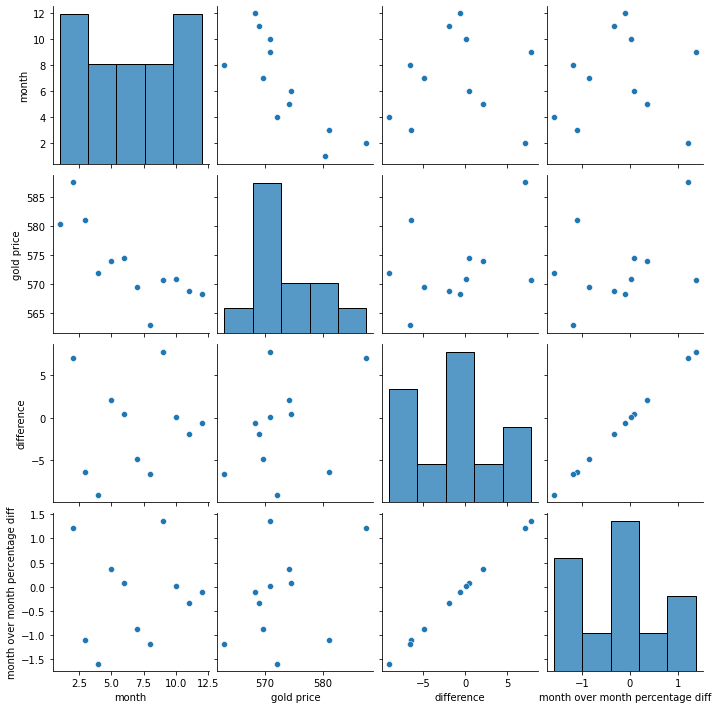

In [171]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(month_summary)

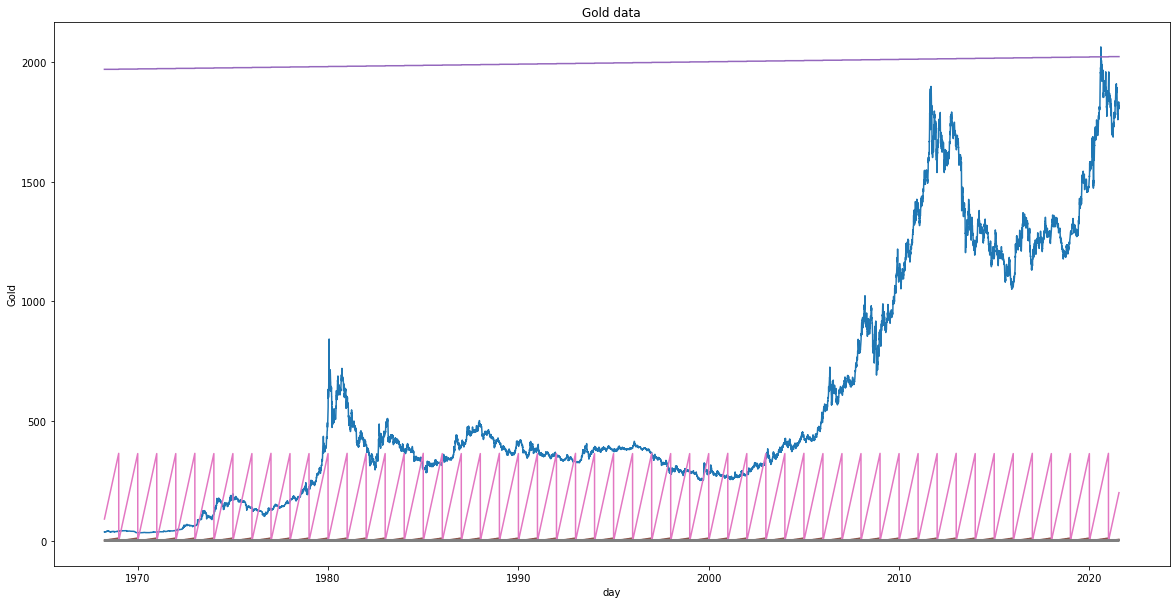

In [48]:
plt.xlabel("day")
plt.ylabel("Gold")
plt.title("Gold data")
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df)


###### Observation: the prices went high near the years 1980, 2010, 2020

In [11]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.dayofyear
df["weekday"] = df.index.weekday
df["weekday"] = df["weekday"].astype(int)
df.head()

,gold,Unnamed: 2,Unnamed: 3,Unnamed: 4,year,month,day,weekday
1968-04-01,38.0,NaN,NaN,NaN,1968,4,92,0
1968-04-02,37.6,NaN,NaN,NaN,1968,4,93,1
1968-04-03,37.7,NaN,NaN,NaN,1968,4,94,2
1968-04-04,36.7,NaN,NaN,NaN,1968,4,95,3
1968-04-05,37.2,NaN,NaN,NaN,1968,4,96,4


<AxesSubplot:xlabel='weekday', ylabel='gold'>

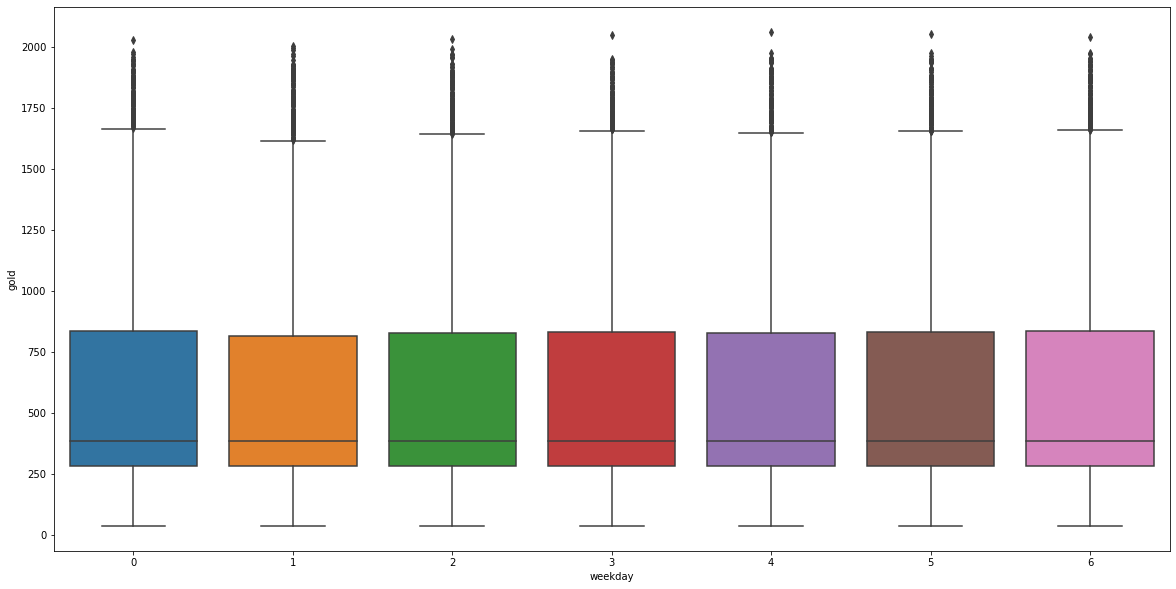

In [12]:
sns.boxplot(x="weekday", y="gold", data=df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19470 entries, 1968-04-01 to 2021-07-21
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gold        19470 non-null  float64
 1   Unnamed: 2  0 non-null      float64
 2   Unnamed: 3  0 non-null      float64
 3   Unnamed: 4  0 non-null      float64
 4   year        19470 non-null  int64  
 5   month       19470 non-null  int64  
 6   day         19470 non-null  int64  
 7   weekday     19470 non-null  int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 1.3 MB


In [14]:
# making a df for regression
dummy_data = pd.get_dummies(df, columns=["weekday"])
df1 =  pd.concat([dummy_data, df], axis=1)
df1.head()

,gold,Unnamed: 2,Unnamed: 3,Unnamed: 4,year,month,day,weekday_0,weekday_1,weekday_2,...,weekday_5,weekday_6,gold,Unnamed: 2,Unnamed: 3,Unnamed: 4,year,month,day,weekday
1968-04-01,38.0,NaN,NaN,NaN,1968,4,92,1,0,0,...,0,0,38.0,NaN,NaN,NaN,1968,4,92,0
1968-04-02,37.6,NaN,NaN,NaN,1968,4,93,0,1,0,...,0,0,37.6,NaN,NaN,NaN,1968,4,93,1
1968-04-03,37.7,NaN,NaN,NaN,1968,4,94,0,0,1,...,0,0,37.7,NaN,NaN,NaN,1968,4,94,2
1968-04-04,36.7,NaN,NaN,NaN,1968,4,95,0,0,0,...,0,0,36.7,NaN,NaN,NaN,1968,4,95,3
1968-04-05,37.2,NaN,NaN,NaN,1968,4,96,0,0,0,...,0,0,37.2,NaN,NaN,NaN,1968,4,96,4


In [15]:
df1 = df1.T.drop_duplicates().T

In [16]:
df1["t"] = list(range(1,len(df1)+1))
df1["t_square"] = df1["t"]**2
df1

,gold,Unnamed: 2,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,t,t_square
1968-04-01,38.00,NaN,1968.0,4.0,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1968-04-02,37.60,NaN,1968.0,4.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
1968-04-03,37.70,NaN,1968.0,4.0,94.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3,9
1968-04-04,36.70,NaN,1968.0,4.0,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4,16
1968-04-05,37.20,NaN,1968.0,4.0,96.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-17,1815.75,NaN,2021.0,7.0,198.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19466,378925156
2021-07-18,1809.50,NaN,2021.0,7.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,19467,378964089
2021-07-19,1803.25,NaN,2021.0,7.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19468,379003024
2021-07-20,1815.30,NaN,2021.0,7.0,201.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19469,379041961


In [17]:
df1["log"] = np.log(df1["gold"])
df1

,gold,Unnamed: 2,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,t,t_square,log
1968-04-01,38.00,NaN,1968.0,4.0,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3.637586
1968-04-02,37.60,NaN,1968.0,4.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4,3.627004
1968-04-03,37.70,NaN,1968.0,4.0,94.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3,9,3.629660
1968-04-04,36.70,NaN,1968.0,4.0,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4,16,3.602777
1968-04-05,37.20,NaN,1968.0,4.0,96.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5,25,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-17,1815.75,NaN,2021.0,7.0,198.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19466,378925156,7.504254
2021-07-18,1809.50,NaN,2021.0,7.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,19467,378964089,7.500806
2021-07-19,1803.25,NaN,2021.0,7.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19468,379003024,7.497346
2021-07-20,1815.30,NaN,2021.0,7.0,201.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19469,379041961,7.504006


In [18]:
train = df1.iloc[0:int(80*df.shape[0]/100)]
test = df1.iloc[int(80*df.shape[0]/100):]

In [19]:
linear_model = smf.ols('gold ~ t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['gold'])-np.array(pred_linear))**2)) 
rmse_linear

729.7722108761873

## Checking the stationarity

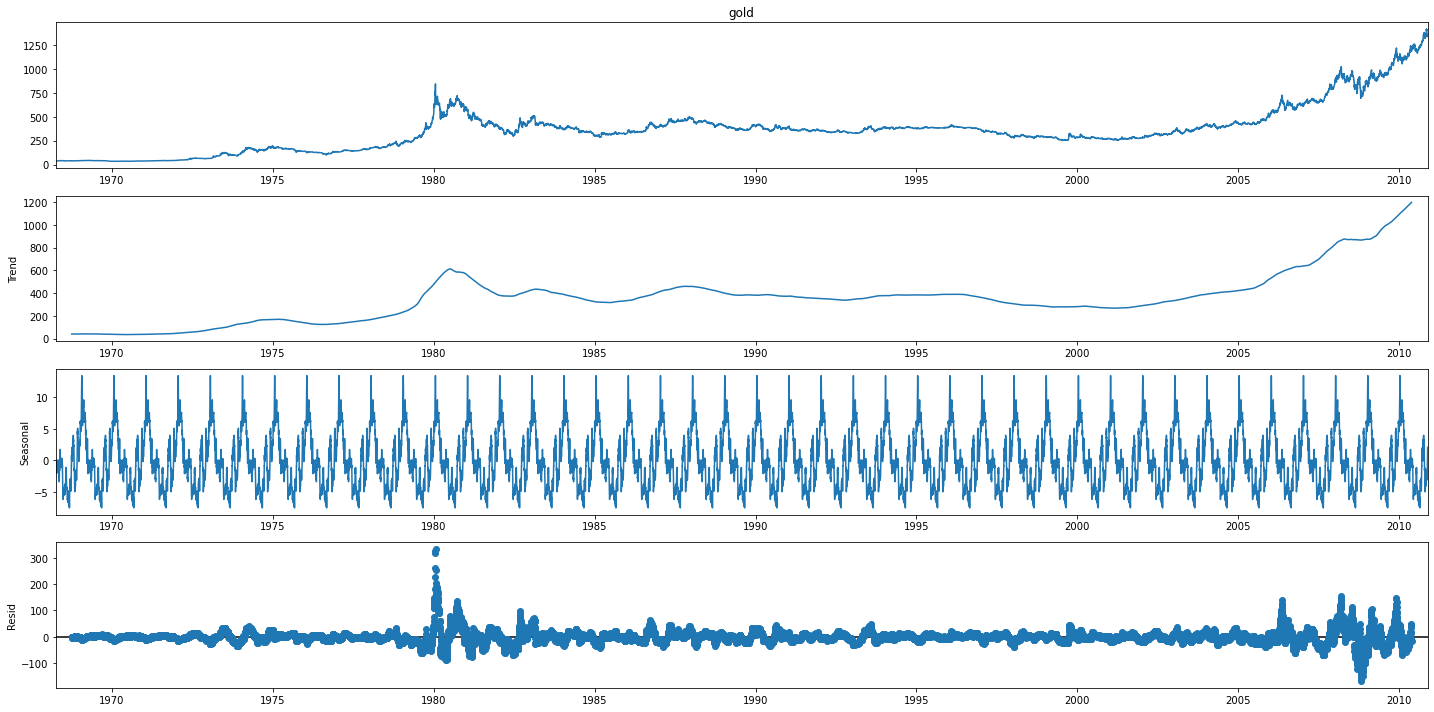

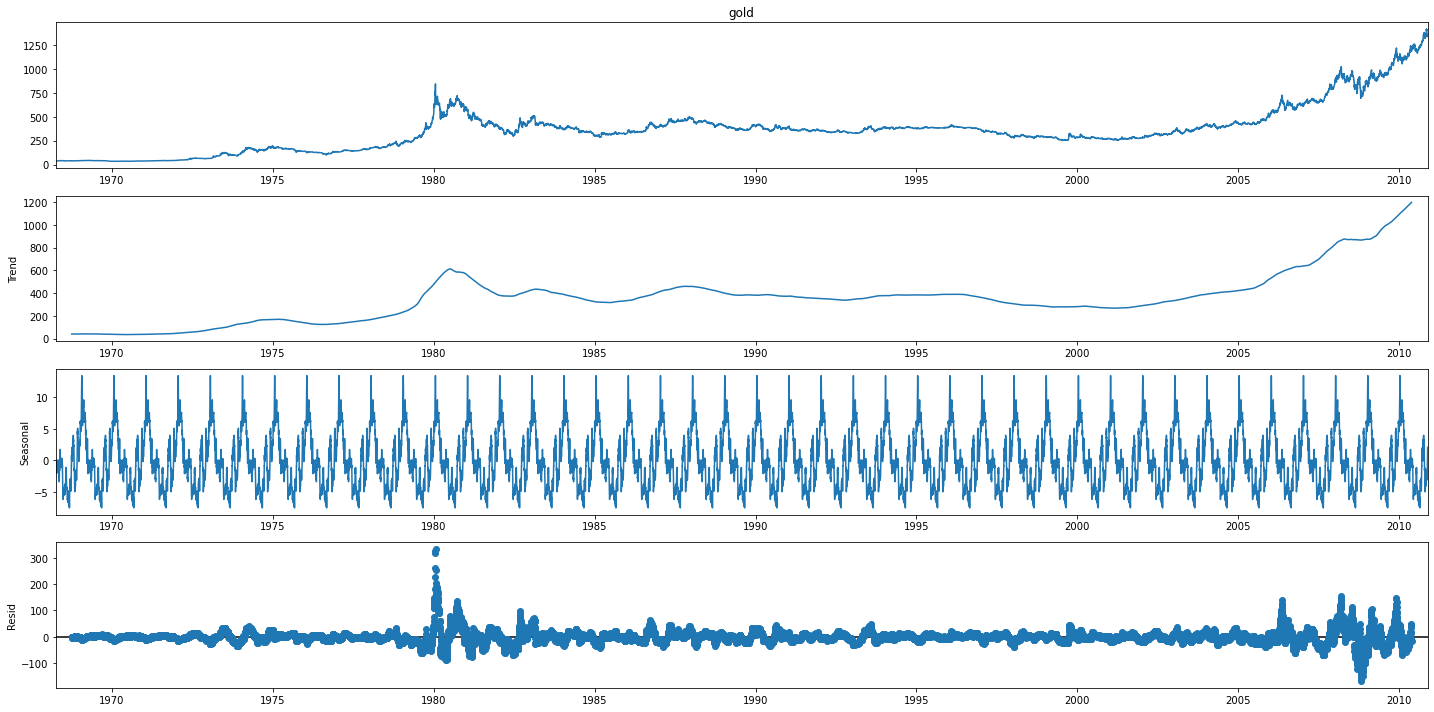

In [20]:
additive_try = seasonal_decompose(train["gold"], model="additive", freq=365)

additive_try.plot()

In [21]:
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

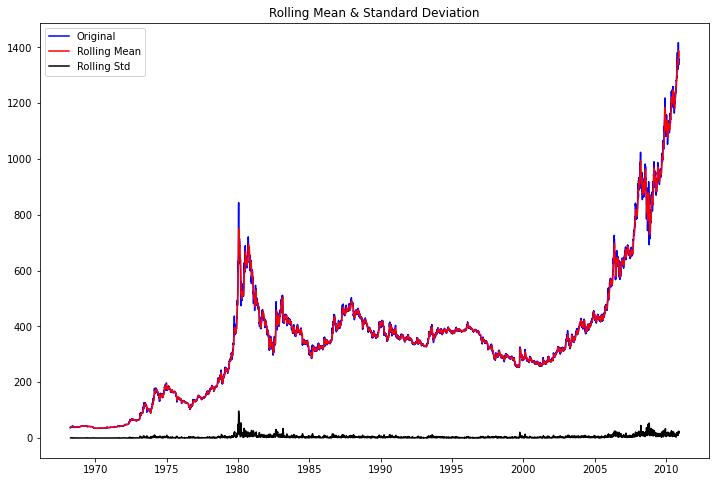

Results of Dickey-Fuller Test:
p-value = 0.9983. The series is likely non-stationary.
Test Statistic                     1.772208
p-value                            0.998292
#Lags Used                        19.000000
Number of Observations Used    15556.000000
Critical Value (1%)               -3.430770
Critical Value (5%)               -2.861726
Critical Value (10%)              -2.566869
dtype: float64


In [22]:
test_stationarity(train["gold"])

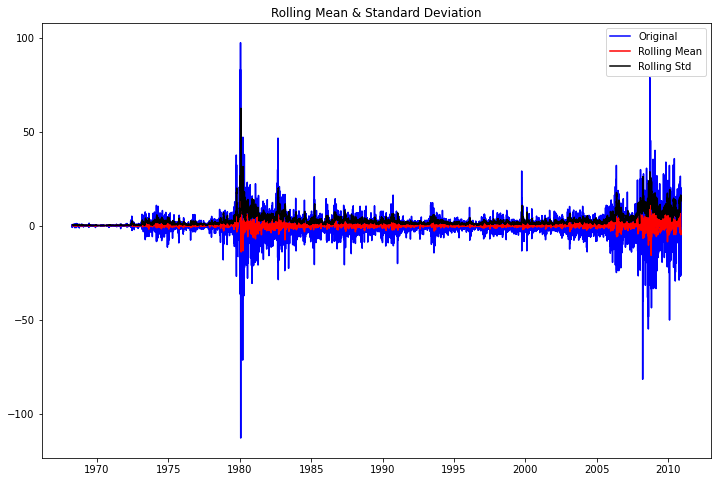

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                   -28.128921
p-value                            0.000000
#Lags Used                        18.000000
Number of Observations Used    15556.000000
Critical Value (1%)               -3.430770
Critical Value (5%)               -2.861726
Critical Value (10%)              -2.566869
dtype: float64


In [23]:
first_diff = train.gold - train.gold.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

In [24]:
model = auto_arima(train['gold'], start_p=0, start_q=0, max_p=4, max_q=4, max_d=2, trace=True, m=2)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[2]             : AIC=inf, Time=46.25 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=103597.086, Time=3.33 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=99717.049, Time=22.44 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=89.72 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=103598.516, Time=4.04 sec
 ARIMA(1,1,0)(2,1,0)[2]             : AIC=98160.097, Time=29.31 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=inf, Time=84.05 sec
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=inf, Time=54.01 sec
 ARIMA(0,1,0)(2,1,0)[2]             : AIC=98158.218, Time=4.93 sec
 ARIMA(0,1,0)(1,1,0)[2]             : AIC=99716.614, Time=3.22 sec
 ARIMA(0,1,0)(2,1,1)[2]             : AIC=inf, Time=57.51 sec
 ARIMA(0,1,1)(2,1,0)[2]             : AIC=98160.074, Time=18.84 sec
 ARIMA(1,1,1)(2,1,0)[2]             : AIC=inf, Time=177.07 sec
 ARIMA(0,1,0)(2,1,0)[2] intercept   : AIC=98160.217, Time=28.91 sec

Best model:  ARIMA(0,1,0)(2,1,0)[2]      

In [25]:
# P = list(range(0,2))
# D = list(range(0,2))
# Q = list(range(0,2))

# i1 = 0
# i2 = 0
# i3 = 0

# seasonal_optimization = {}

# while i1 < len(P):
#     while i2 < len(D):
#         while i3 < len(Q):
#             modeling = make_model(train, i1, i2, i3)
      

#             model = modeling.fit()

#             aic = model.aic
#             seasonal_optimization[f"ARIMA({i1}, {i2}, {i3})"] = aic
      
#             i3 += 1

#         i3 = 0
#         i2 += 1
#     i2 = 0
#     i1 += 1


# best = min(seasonal_optimization.values())

# for k, v in seasonal_optimization.items():
#     if v == best:
#         print(k,v)

In [26]:
model = ARIMA(endog=list(train["gold"]),order=(0,1,0))
model = model.fit()
model.aic

93498.57553588305

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                15576
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -46748.288
Date:                Wed, 25 Aug 2021   AIC                          93498.576
Time:                        13:14:15   BIC                          93506.229
Sample:                             0   HQIC                         93501.110
                              - 15576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        23.6915      0.044    534.970      0.000      23.605      23.778
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):           3324058.26
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


aThe CV value reached its highest in year 1978 near to 25%, which could have made the asset as highly risky

b.But in 2020, the CV value is closer to 5%, which makes the asset viable for good investmen

In [28]:
train    =   df[df.index.year <= 2015] 
test     =   df[df.index.year > 2015]

In [29]:
print(train.shape)
print(test.shape)

(17441, 8)
(2029, 8)


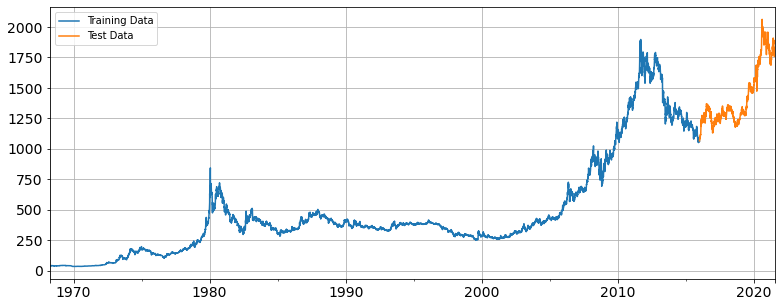

In [30]:
train['gold'].plot(figsize=(13,5), fontsize=14)
test['gold'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(17441, 2029)

In [32]:
LR_train = train.copy()
LR_test = test.copy()

In [33]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [34]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['gold'].values)

LinearRegression()

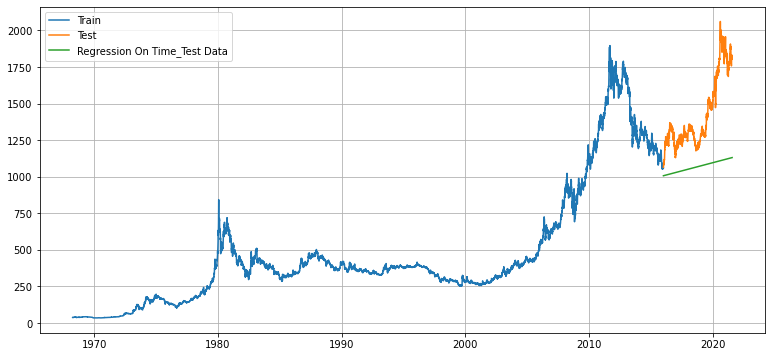

In [35]:
test_predictions_model1         = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['gold'], label='Train')
plt.plot(test['gold'], label='Test')
plt.plot(LR_test['forecast'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [36]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [37]:
# Get MAPE of the model

mape_model1_test = mape(test['gold'].values,test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test),"%")

For RegressionOnTime forecast on the Test Data,  MAPE is 23.620 %


In [38]:
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]},index=['RegressionOnTime'])
results

,Test MAPE (%)
RegressionOnTime,23.62
